##### `KNN - K Nearest Neighbours`

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/Dataset_20240421.csv')

In [ ]:
df.head()

,Unnamed: 0,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,0,5,4,4,5,7,10,3,2,1,2
1,1,3,1,1,1,2,2,3,1,1,2
2,2,6,8,8,1,3,4,3,7,1,2
3,3,4,1,1,3,2,1,3,1,1,2
4,4,8,10,10,8,7,10,9,7,1,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Unnamed: 0                   698 non-null    int64 
 1   Clump_thickness              698 non-null    int64 
 2   Uniformity_Cell_Size         698 non-null    int64 
 3   Uniformity_Cell_Shape        698 non-null    int64 
 4   Marginal_Adhesion            698 non-null    int64 
 5   Single_Epithelial_Cell_Size  698 non-null    int64 
 6   Bare_Nuclei                  698 non-null    object
 7   Bland_Chromatin              698 non-null    int64 
 8   Normal_Nucleoli              698 non-null    int64 
 9   Mitoses                      698 non-null    int64 
 10  Class                        698 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [ ]:
df = df.drop(['Unnamed: 0'], axis=1)

In [ ]:
df['Bare_Nuclei'].unique()

array(['10', '2', '4', '1', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [ ]:
df['Bare_Nuclei'] = pd.to_numeric(df['Bare_Nuclei'], errors='coerce')

In [ ]:
correlation = df.corr()

Our target variable is Class. So, we should check how each attribute correlates with the Class variable. We can do it as follows:

In [ ]:
correlation['Class'].sort_values(ascending=False)

Class                          1.000000
Bare_Nuclei                    0.822563
Uniformity_Cell_Shape          0.818794
Uniformity_Cell_Size           0.817772
Bland_Chromatin                0.756732
Clump_thickness                0.716509
Normal_Nucleoli                0.712067
Marginal_Adhesion              0.696605
Single_Epithelial_Cell_Size    0.682618
Mitoses                        0.423008
Name: Class, dtype: float64

Interpretation
The correlation coefficient ranges from -1 to +1.

When it is close to +1, this signifies that there is a strong positive correlation. So, we can see that there is a strong positive correlation between Class and Bare_Nuclei, Class and Uniformity_Cell_Shape, Class and Uniformity_Cell_Size.

When it is clsoe to -1, it means that there is a strong negative correlation. When it is close to 0, it means that there is no correlation.

We can see that all the variables are positively correlated with Class variable. Some variables are strongly positive correlated while some variables are negatively correlated.

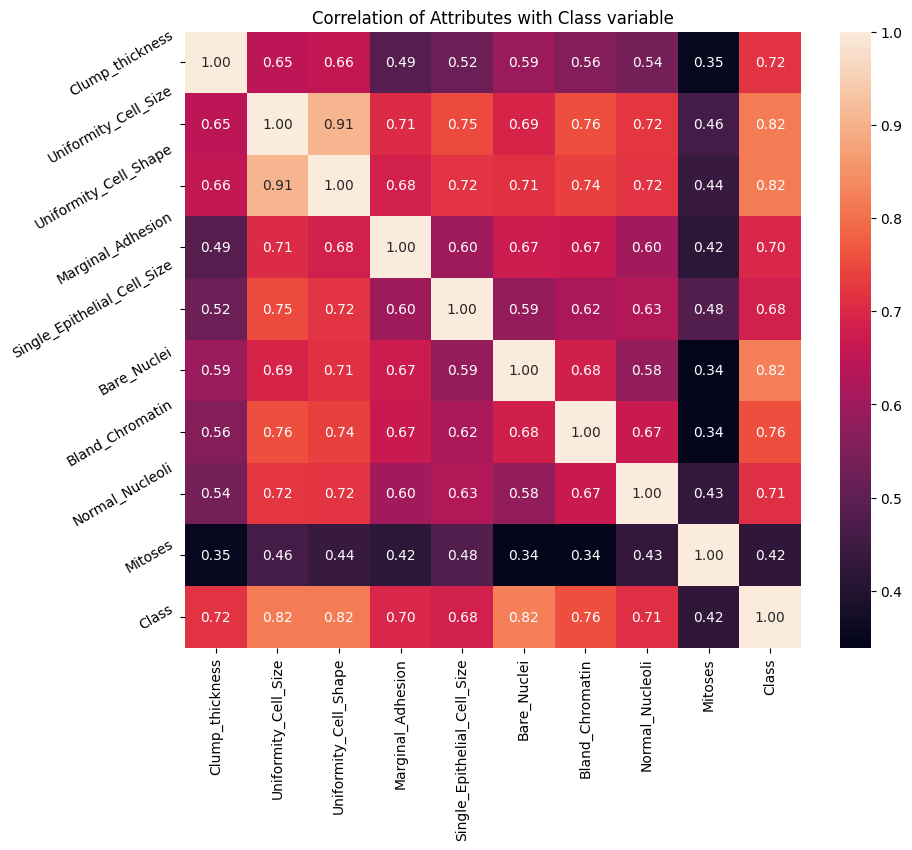

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Correlation of Attributes with Class variable')
a = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)
plt.show()

Interpretation

From the above correlation heat map, we can conclude that :

Class is highly positive correlated with Uniformity_Cell_Size, Uniformity_Cell_Shape and Bare_Nuclei. (correlation coefficient = 0.82).

Class is positively correlated with Clump_thickness (correlation coefficient=0.72), Marginal_Adhesion (correlation coefficient=0.70), Single_Epithelial_Cell_Size (correlation coefficient = 0.68) and Normal_Nucleoli (correlation coefficient=0.71).

Class is weekly positive correlated with Mitoses (correlation coefficient=0.42).

The Mitoses variable is weekly positive correlated with all the other variables (correlation coefficient < 0.50).

Declare feature vector and target variable

In [ ]:
X = df.drop(['Class'], axis=1)
y = df['Class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
X_train.shape, X_test.shape

((558, 9), (140, 9))

In [ ]:
X_train.isnull().sum()

Clump_thickness                 0
Uniformity_Cell_Size            0
Uniformity_Cell_Shape           0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    15
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
dtype: int64

In [ ]:
for col in X_train.columns:
    if X_train[col].isnull().mean() > 0:
        print(col, round(X_train[col].isnull().mean(), 4))

Bare_Nuclei 0.0269


In [ ]:
for df1 in [X_train, X_test]:
    for col in X_train.columns:
        col_median = X_train[col].median()
        df1[col].fillna(col_median, inplace=True)

In [ ]:
X_train.isnull().sum()

Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
dtype: int64

In [ ]:
cols = X_train.columns

In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [ ]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [ ]:
X_train.head()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,0.574621,-0.040143,0.277515,-0.629622,0.775913,-0.384119,-0.171342,1.983330,-0.333601
1,-0.497748,-0.680143,-0.721540,-0.629622,-0.549473,-0.661042,-0.171342,-0.601658,-0.333601
2,0.932077,1.879857,0.277515,2.541854,2.984890,-0.107196,0.660039,0.044589,0.859663
3,0.932077,0.599857,0.943552,0.075150,-0.107678,1.277420,1.491419,0.367712,-0.333601
4,-0.855205,-0.680143,-0.721540,-0.629622,-0.549473,-0.661042,-1.002722,-0.601658,-0.333601


In [ ]:
knn = KNeighborsClassifier(n_neighbors=6)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [ ]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.9643


In [ ]:
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0, 0])

print('\nTrue Negatives(TN) = ', cm[1, 1])

print('\nFalse Positives(FP) = ', cm[0, 1])

print('\nFalse Negatives(FN) = ', cm[1, 0])

Confusion matrix

 [[83  2]
 [ 3 52]]

True Positives(TP) =  83

True Negatives(TN) =  52

False Positives(FP) =  2

False Negatives(FN) =  3


<Axes: >

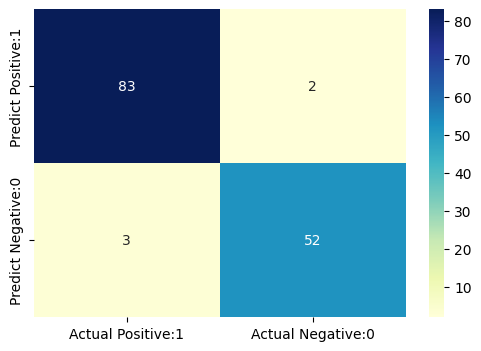

In [ ]:
plt.figure(figsize=(6, 4))

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       0.97      0.98      0.97        85
           4       0.96      0.95      0.95        55

    accuracy                           0.96       140
   macro avg       0.96      0.96      0.96       140
weighted avg       0.96      0.96      0.96       140



In [ ]:
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]

In [ ]:
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9643


In [ ]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0357


In [ ]:
precision = TP / float(TP + FP)

print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9765


In [ ]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9651


In [ ]:
true_positive_rate = TP / float(TP + FN)

print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.9651


In [ ]:
false_positive_rate = FP / float(FP + TN)

print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.0370


Websites for learning KNN:
* https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm

* https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn

* https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/

* https://dataaspirant.com/k-nearest-neighbor-classifier-intro/